In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import linregress
from scipy.optimize import curve_fit
from pymer4.models import Lmer
import math
import re
from scipy import optimize
import pwlf
from sklearn.metrics import r2_score
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

In [4]:
#子图1

In [2]:
'''用来验证对模型进行描述'''

ax1_T_1 = np.arange(5, 30, 0.0001)
ax1_Q10_1 = -0.021*ax1_T_1 + 1.7
k = np.log(ax1_Q10_1)
ax1_lnR_1 = []
lnRi = -0.3
for i in range(len(ax1_T_1)):
    lnRi+=k[i]*0.00001
    ax1_lnR_1.append(lnRi)
    
ax1_T_2 = np.arange(5, 30, 0.0001)
ax1_Q10_2 = -0.02*ax1_T_2 + 1.97
k = np.log(ax1_Q10_2)
ax1_lnR_2 = []
lnRi = -0.35
for i in range(len(ax1_T_1)):
    lnRi+=k[i]*0.00001
    ax1_lnR_2.append(lnRi)

ax1_lnR_1 = np.array(ax1_lnR_1)
ax1_lnR_2 = np.array(ax1_lnR_2)

In [3]:
#子图3

In [3]:
'''用来验证ΔR和AVP之间的关系  Forest'''

ax2_T_1 = np.arange(5, 30, 0.00001)

#fixed AVP
#ax2_Q10_1 = 5.99103066e-04*ax2_T_1**2 - 3.93586793e-02*ax2_T_1 + 1.93101272e+00
#ax2_Q10_1 = 6.95285721e-04*ax2_T_1**2 - 4.17148517e-02*ax2_T_1 + 1.92320229e+00  #forest fixed AVP after cal median
ax2_Q10_1 = 6.83058811e-04*ax2_T_1**2 -4.16708993e-02*ax2_T_1 + 1.93180513e+00  #forest fixed AVP after cal mean

k = np.log(ax2_Q10_1)
ax2_lnR_1 = []
lnRi = 0
for i in range(len(ax2_T_1)):
    lnRi+=k[i]*0.000001
    ax2_lnR_1.append(lnRi)

#fixed VPD
ax2_T_2 = np.arange(5, 30, 0.00001)
#ax2_Q10_2 = -0.02181651*ax2_T_2 + 1.87574491   #-0.02181651  1.87574491
ax2_Q10_2 = -0.02366408*ax2_T_2 + 1.8993302  #forest fixed VPD after cal

k1 = np.log(ax2_Q10_2)
ax2_lnR_2 = []
lnRi = 0
for i in range(len(ax2_T_1)):
    lnRi+=k1[i]*0.000001
    ax2_lnR_2.append(lnRi)

ax2_lnR_1 = np.array(ax2_lnR_1)   
ax2_lnR_2 = np.array(ax2_lnR_2)

ax2_delt_lnR = []
ax2_delt_AVP = []

VPDc = 5
SVP = 6.109*np.exp((17.625*ax2_T_1)/(243.04+ax2_T_1))
AVP = SVP - VPDc

AVP0 = 15
index_AVP0 = np.argmin(abs(SVP-AVP0-VPDc))

for AVPi in range(5,35):
    index_AVPi = np.argmin(abs(SVP-AVPi-VPDc))
    delt_lnR1 = ax2_lnR_1[index_AVPi]-ax2_lnR_1[index_AVP0]
    delt_lnR2 = ax2_lnR_2[index_AVPi]-ax2_lnR_2[index_AVP0]
    ax2_delt_AVP.append(AVPi)
    ax2_delt_lnR.append(delt_lnR2-delt_lnR1)

In [4]:
'''用来验证ΔR和AVP之间的关系  Non Forest'''

ax3_T_1 = np.arange(5, 30, 0.00001)

#fixed AVP
#ax3_Q10_1 = 5.63626411e-04*ax3_T_1**2 - 3.75182836e-02*ax3_T_1 + 1.96209135e+00
#ax3_Q10_1 = 5.88121506e-04*ax3_T_1**2 - 3.74317241e-02*ax3_T_1 + 1.93918048e+00   #non forest fixed AVP after cal median
ax3_Q10_1 = 5.83771928e-04*ax3_T_1**2 -3.76629560e-02*ax3_T_1 + 1.94918719e+00    #non forest fixed AVP after cal mean

k = np.log(ax3_Q10_1)
ax3_lnR_1 = []
lnRi = 0
for i in range(len(ax3_T_1)):
    lnRi+=k[i]*0.000001
    ax3_lnR_1.append(lnRi)

#fixed VPD
ax3_T_2 = np.arange(5, 30, 0.00001)
#ax3_Q10_2 = -0.02227473*ax3_T_2 + 1.95747386   #-0.02227473  1.95747386
#ax3_Q10_2 = -0.02434679*ax3_T_2 + 1.98672326  #non forest fixed VPD after cal median 
ax3_Q10_2 = -0.02407539*ax3_T_2 + 1.9821392  #non forest fixed VPD after cal  mean

k1 = np.log(ax3_Q10_2)
ax3_lnR_2 = []
lnRi = 0
for i in range(len(ax3_T_1)):
    lnRi+=k1[i]*0.000001
    ax3_lnR_2.append(lnRi)

ax3_lnR_1 = np.array(ax3_lnR_1)   
ax3_lnR_2 = np.array(ax3_lnR_2)

ax3_delt_lnR = []
ax3_delt_AVP = []

VPDc = 5
SVP = 6.109*np.exp((17.625*ax3_T_1)/(243.04+ax3_T_1))
AVP = SVP - VPDc

AVP0 = 15
index_AVP0 = np.argmin(abs(SVP-AVP0-VPDc))

for AVPi in range(5,35):
    index_AVPi = np.argmin(abs(SVP-AVPi-VPDc))
    #print(index_AVPi, SVP[index_AVPi], ax3_T_2[index_AVPi])
    delt_lnR1 = ax3_lnR_1[index_AVPi]-ax3_lnR_1[index_AVP0]
    delt_lnR2 = ax3_lnR_2[index_AVPi]-ax3_lnR_2[index_AVP0]
    ax3_delt_AVP.append(AVPi)
    ax3_delt_lnR.append(delt_lnR2-delt_lnR1)

In [5]:
SVP = 6.109*np.exp((17.625*ax3_T_1)/(243.04+ax3_T_1))
VPD_f = SVP-26.08
VPD_n = SVP -27.25
ax4_Tf = ax3_T_2[VPD_f>0]
VPD_f = VPD_f[VPD_f>0]
ax4_Tn = ax3_T_2[VPD_n>0]
VPD_n = VPD_n[VPD_n>0]

In [ ]:
#VPD=5

In [6]:
Q10_data = pd.read_csv('./Old_result/A_result_2/Q10_forest_VPD_days10.csv') #_non
m,n = Q10_data.shape

Q10_plot_all2 = []
T_plot_all2 = []
for j in range(m):
    if Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 50 and Q10_data['T'][j] >= 5:
        Q10_plot_all2.append(Q10_data['Q10'][j])
        T_plot_all2.append(Q10_data['T'][j])
        
Q10_plot2 = []
T_plot2 = []
AVP_plot2 =[]
Q10_std_2 = []
for AVPi in np.arange(5,23,1):
    Q10_ploti = []
    T_ploti = []
    SEi = []
    for j in range(m):
        if Q10_data['AVP'][j] == AVPi and Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 50 and Q10_data['T'][j] >= 5:
            Q10_ploti.append(Q10_data['Q10'][j])
            T_ploti.append(Q10_data['T'][j])
            SEi.append(Q10_data['SE'][j])
    if len(T_ploti)>=2:
        Q10_plot2.append(Q10_ploti)
        T_plot2.append(T_ploti)
        AVP_plot2.append(AVPi)
        Q10_std_2.append(SEi)

##########################################################################################################################################


Q10_data = pd.read_csv('./Old_result/A_result_2/Q10_non_forest_VPD_days10.csv') #_non
m,n = Q10_data.shape

Q10_plot_all4 = []
T_plot_all4 = []
for j in range(m):
    if Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 50 and Q10_data['T'][j] >= 5:
        Q10_plot_all4.append(Q10_data['Q10'][j])
        T_plot_all4.append(Q10_data['T'][j])
        
Q10_plot4 = []
T_plot4 = []
AVP_plot4 =[]
Q10_std_4 = []
for AVPi in np.arange(5,23,1):
    Q10_ploti = []
    T_ploti = []
    SEi = []
    for j in range(m):
        if Q10_data['AVP'][j] == AVPi and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1 and Q10_data['num'][j] >= 50 and Q10_data['T'][j] >= 5:
            Q10_ploti.append(Q10_data['Q10'][j])
            T_ploti.append(Q10_data['T'][j])
            SEi.append(Q10_data['SE'][j])
    if len(T_ploti)>=1:
        Q10_plot4.append(Q10_ploti)
        T_plot4.append(T_ploti)
        AVP_plot4.append(AVPi)
        Q10_std_4.append(SEi)

In [7]:
data1 = pd.read_csv('./Result/Result_3/Cor_non_forest_AVP_RECO_b.csv')
m,n = data1.shape
cor_AVP_RECO1 = []
for i in range(m):
    if np.isnan(data1['VPD_RECO'][i]) != 1:
        cor_AVP_RECO1.append(data1['VPD_RECO'][i])

data1 = pd.read_csv('./Result/Result_3/Cor_forest_AVP_RECO_b.csv')
m,n = data1.shape
for i in range(m):
    if np.isnan(data1['VPD_RECO'][i]) != 1:
        cor_AVP_RECO1.append(data1['VPD_RECO'][i])



data2 = pd.read_csv('./Result/Result_3/Cor_non_forest_AVP_RECO_u.csv')  #Cor_non_forest_AVP_RECO_u_days30_cal.csv')
m,n = data2.shape
cor_AVP_RECO2 = []
for i in range(m):
    if np.isnan(data2['VPD_RECO'][i]) != 1:
        cor_AVP_RECO2.append(data2['VPD_RECO'][i])

data2 = pd.read_csv('./Result/Result_3/Cor_forest_AVP_RECO_u.csv')
m,n = data2.shape
for i in range(m):
    if np.isnan(data2['VPD_RECO'][i]) != 1:
        cor_AVP_RECO2.append(data2['VPD_RECO'][i])
        

5
[-0.02181651  1.87574491]
5
[-0.02227473  1.95747386]
[-0.00017605  0.00909819 -0.09691735]
[-0.00019428  0.01065069 -0.11679081]


C:\Users\111\AppData\Local\Temp\ipykernel_14112\4232614474.py:214: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


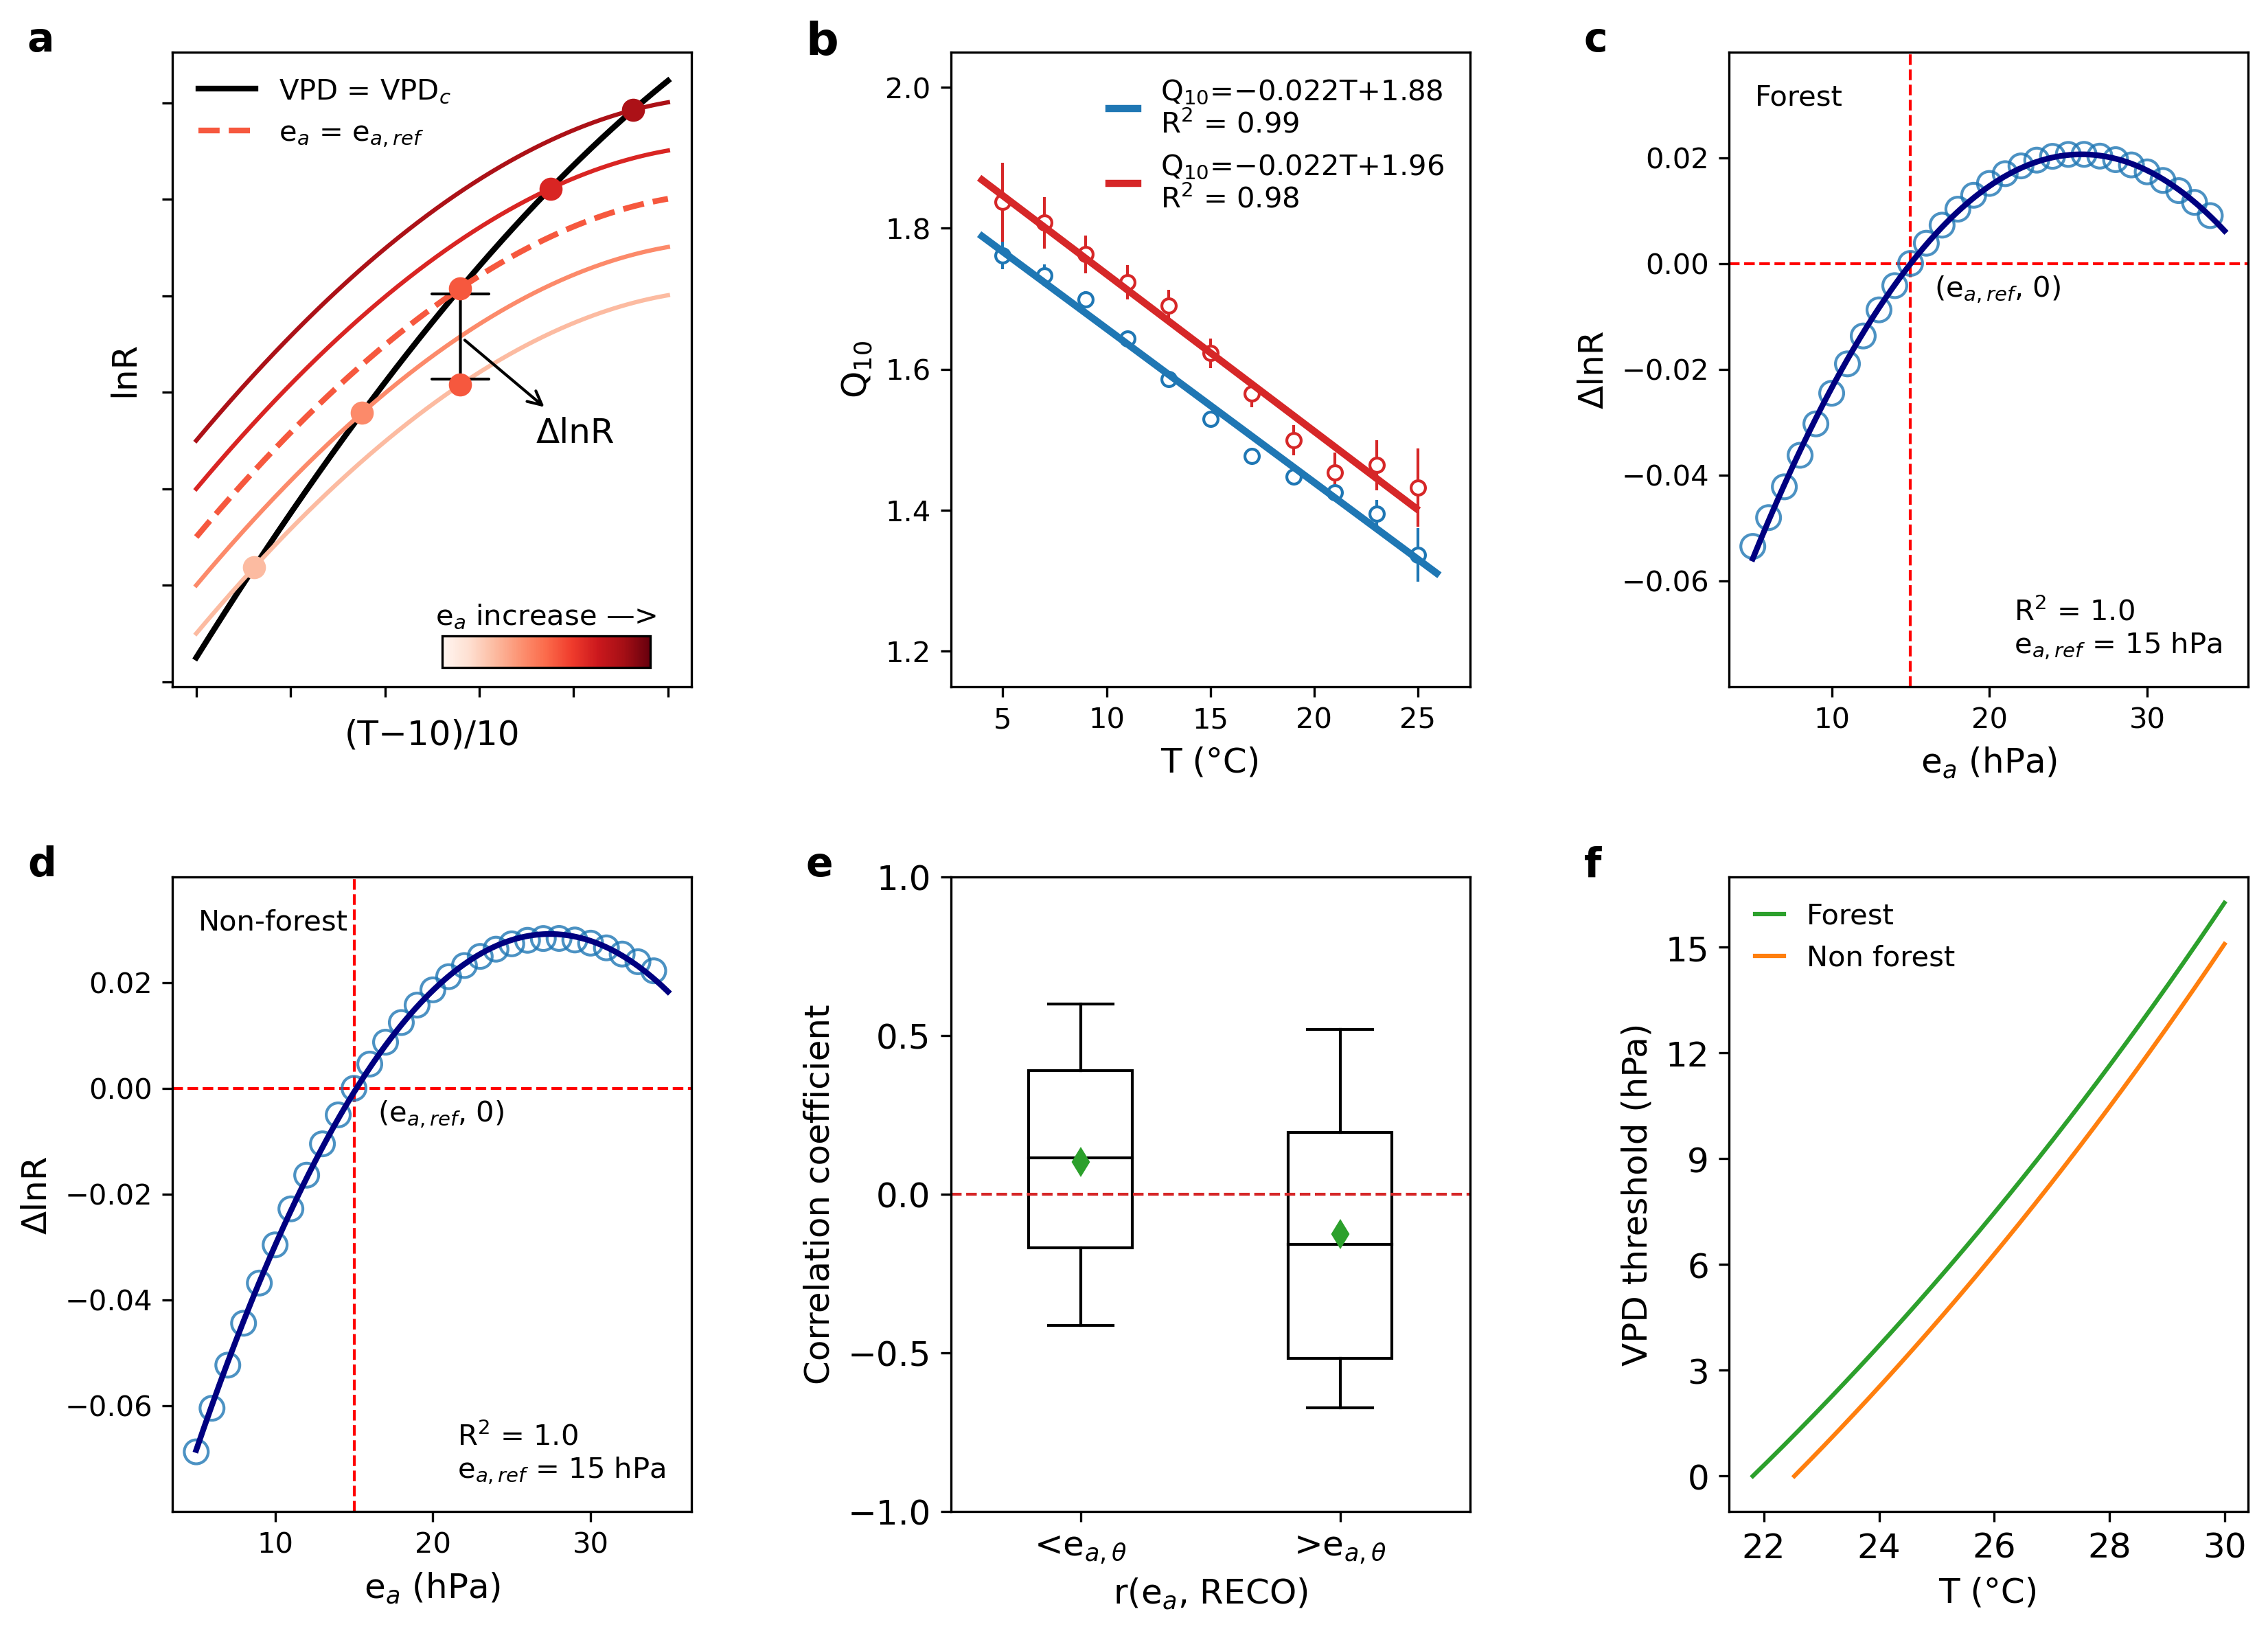

In [10]:
fig = plt.figure(figsize=(13, 4*2.3),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.3)
plt.rcParams['axes.linewidth'] = 0.8

################################################################################################################################################

g = 0

ax1 = fig.add_subplot(2,3,2)

ax1.errorbar(T_plot2[g],
             Q10_plot2[g],
             Q10_std_2[g],
             fmt='o',          #marker='o',c='',edgecolors='g'
             color = 'white',
             mec = 'tab:blue',
             mew = 1,
             ecolor = 'tab:blue',
             elinewidth = 1,
             capsize = 0,
             markersize = 5,
             );

#same_VPD
x = T_plot2[g]
y = Q10_plot2[g]
coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)
print(AVP_plot2[g])
print(coefficients)

#ax1.scatter(T_plot2[g], Q10_plot2[g], marker='o', edgecolor=colors[i], facecolor='none', s=50, alpha=0.4)
x_plot2 = np.arange(4,26,0.1)
ax1.plot(x_plot2, p(x_plot2), color='tab:blue', linewidth=2.5, label='Q$_{10}$=\u22120.022T+1.88'+'\nR$^{2}$ = '+str(round(r_squared,2)), zorder=4)


ax1.errorbar(T_plot4[g],
             Q10_plot4[g],
             Q10_std_4[g],
             fmt='o',          #marker='o',c='',edgecolors='g'
             color = 'white',
             mec = 'tab:red',
             mew = 1,
             ecolor = 'tab:red',
             elinewidth = 1,
             capsize = 0,
             markersize = 5,
             );
#same_VPD
x = T_plot4[g]
y = Q10_plot4[g]
coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)
print(AVP_plot4[g])
print(coefficients)


# 计算决定系数（R-squared）
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)

# 绘制原始数据和拟合曲线

#ax2.scatter(T_plot4[g], Q10_plot4[g], marker='o', edgecolor=colors[i], facecolor='none', s=50, alpha=0.4)
x_plot4 = np.arange(4,25,0.1)
ax1.plot(x_plot4, p(x_plot4), color='tab:red', linewidth=2.5, label='Q$_{10}$=\u22120.022T+1.96'+'\nR$^{2}$ = '+str(round(r_squared,2)), zorder=4)

ax1.legend(fontsize=10, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
ax1.set_ylim(1.15, 2.05)
ax1.set_xlim(2.5, 27.5)
ax1.set_xticks(np.linspace(5,25,5))
ax1.set_yticks(np.linspace(1.2, 2.0, 5))
ax1.set_xlabel('T (°C)',size = 12)
ax1.set_ylabel('Q$_{10}$',size = 12)
ax1.text(-0.28, 1.05, "b", transform=ax1.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

################################################################################################################################################################
ax = fig.add_subplot(2,3,1)
ax_pos = ax.get_position()
x1 = ax_pos.x0
y1 = ax_pos.y0
width1 = ax_pos.width
height1 = ax_pos.height
cax = fig.add_axes([x1+0.52*width1, y1+0.03*height1, 0.4*width1, 0.05*height1])  #四个参数分别是colorbar的左、下、宽、长 
cbar = mpl.colorbar.ColorbarBase(cax, cmap='Reds',#颜色
                                  norm=mpl.colors.Normalize(-1,1),#设置颜色条最大最小值
                                  ticks=list(np.linspace(-1, 1, 5)),#自定义各段的记号
                                  orientation='horizontal', #方向垂直
                                  label = 'e$_{a}$ increase —>');
cbar.ax.xaxis.set_label_position('top') # 移动colorbar的标签到顶部
cbar.ax.tick_params(direction='in', bottom = False, top = True, labelbottom = False, labeltop = True, length=0, colors='k') # 设置标签样式
cbar.ax.tick_params(labelsize=10)
cbar.set_ticks([])

sm = plt.cm.ScalarMappable(norm=cbar.norm, cmap=cbar.cmap)

ax.plot(ax1_T_1, ax1_lnR_2, linewidth=2, color='black', label = 'VPD = VPD$_{c}$')

colors = []
for i in range(5):
    value = -0.5+i*0.3
    color = sm.to_rgba(value)
    colors.append(color)

for i in range(5):
    index1 = np.argmin(abs(ax1_lnR_1+0.1*i-ax1_lnR_2))
    
    if i == 2:
        ax.plot(ax1_T_1, (ax1_lnR_1+0.1*i), linewidth=2, ls='--', color=colors[i], label = 'e$_{a}$ = e$_{a,ref}$')
        ax.scatter(ax1_T_1[index1], ax1_lnR_1[index1], s=50, marker='o', color=colors[i], zorder=5)
        ax.scatter(ax1_T_1[index1], ax1_lnR_2[index1], s=50, marker='o', color=colors[i], zorder=5)
        
        ax.annotate('', xy=(ax1_T_1[index1], ax1_lnR_1[index1]), xytext=( ax1_T_1[index1], ax1_lnR_2[index1]),
            arrowprops=dict(arrowstyle='|-|'))
        ax.annotate('ΔlnR', xy=(ax1_T_1[index1], ax1_lnR_2[index1]-0.1), xytext=( ax1_T_1[index1]+4,ax1_lnR_1[index1]-0.12),
            arrowprops=dict(arrowstyle='<-'), fontsize=12)
        
    else:
        ax.plot(ax1_T_1, (ax1_lnR_1+0.1*i), linewidth=1.5, color=colors[i])
        ax.scatter(ax1_T_1[index1], ax1_lnR_2[index1], s=50, marker='o', color=colors[i], zorder=5)
    

ax.legend(fontsize=10, edgecolor='white', loc='upper left', frameon=True, handlelength = 2)
ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.set_xticks([])
#ax.set_yticks([])
ax.set_xlabel('(T\u221210)/10',size = 12)
ax.set_ylabel('lnR',size = 12)
ax.text(-0.28, 1.05, "a", transform=ax.transAxes,
         fontsize=14, fontweight='bold', va='top', ha='left')

##################################################################################################################################################################

ax2 = fig.add_subplot(2,3,3)
ax2.scatter(ax2_delt_AVP, ax2_delt_lnR, marker='o', edgecolor='tab:blue', facecolor='none', s=70, alpha=0.8)
ax2.axhline(y=0,ls="--",linewidth=1,c="red", zorder=0)
ax2.axvline(x=15,ls="--",linewidth=1,c="red", zorder=0)
#ax2.text(6, -0.3, 'VPD=VPD$_{ref}$', fontsize=10, color='black')

x = ax2_delt_AVP
y = ax2_delt_lnR
coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)
print(coefficients)

x_plot = np.arange(5,35,0.1)
ax2.plot(x_plot, p(x_plot), color='navy', linewidth=2, label='R$^{2}$ = '+str(round(r_squared,2))+'\ne$_{a,ref}$ = 15 hPa')

ax2.legend(fontsize=10, edgecolor='white', loc='lower right', frameon=True, handlelength = 0)

ax2.set_ylim(-0.08,0.04)
ax2.set_yticks(np.linspace(-0.06,0.02, 5))

ax2.set_xlabel('e$_{a}$ (hPa)',size = 12)
ax2.set_ylabel('ΔlnR',size = 12)
ax2.text(0.05, 0.95, "Forest", transform=ax2.transAxes,
         fontsize=10, fontweight='normal', va='top', ha='left')
ax2.text(16.5, -0.002, "(e$_{a,ref}$, 0)",
         fontsize=10, fontweight='normal', va='top', ha='left')
ax2.text(-0.28, 1.05, "c", transform=ax2.transAxes,
         fontsize=14, fontweight='bold', va='top', ha='left')



##################################################################################################################################################################

ax3 = fig.add_subplot(2,3,4)

ax3.scatter(ax3_delt_AVP, ax3_delt_lnR, marker='o', edgecolor='tab:blue', facecolor='none', s=70, alpha=0.8)
ax3.axhline(y=0,ls="--",linewidth=1,c="red", zorder=0)
ax3.axvline(x=15,ls="--",linewidth=1,c="red", zorder=0)

x = ax3_delt_AVP
y = ax3_delt_lnR
coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)
print(coefficients)

x_plot = np.arange(5,35,0.1)
ax3.plot(x_plot, p(x_plot), color='navy', linewidth=2, label='R$^{2}$ = '+str(round(r_squared,2))+'\ne$_{a,ref}$ = 15 hPa')

ax3.legend(fontsize=10, edgecolor='white', loc='lower right', frameon=True, handlelength = 0)

ax3.set_ylim(-0.08,0.04)
ax3.set_yticks(np.linspace(-0.06,0.02, 5))

ax3.set_xlabel('e$_{a}$ (hPa)',size = 12)
ax3.set_ylabel('ΔlnR',size = 12)       #(umol CO$_{2}$ m$^{-2}$ s$^{-1}$)
ax3.text(0.05, 0.95, "Non-forest", transform=ax3.transAxes,
         fontsize=10, fontweight='normal', va='top', ha='left')
ax3.text(16.5, -0.002, "(e$_{a,ref}$, 0)",
         fontsize=10, fontweight='normal', va='top', ha='left')
ax3.text(-0.28, 1.05, "d", transform=ax3.transAxes,
         fontsize=14, fontweight='bold', va='top', ha='left')

#################################################################################################################################################
ax4 = fig.add_subplot(2,3,5)
cm = plt.cm.get_cmap('Blues')
labels = ['<e$_{a,θ}$', '>e$_{a,θ}$']

boxplot = ax4.boxplot([cor_AVP_RECO1, cor_AVP_RECO2],
                whis = (10,90),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =True,
                meanprops={'marker': 'd', 'markersize': 6, 'color':'purple'},
                medianprops = {'color':'black'},
                labels = labels,
                widths=0.4,
                capwidths=0.25,
            )

box_color = 'white'
box_alpha = 1.0
for patch in boxplot['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)

ax4.axhline(y=0,ls="--",linewidth=1,c="tab:red", zorder=2)
ax4.set_xlabel('r(e$_{a}$, RECO)', size = 12)
ax4.set_ylabel('Correlation coefficient', size = 12)
ax4.tick_params(axis='x',labelsize=12)
ax4.tick_params(axis='y',labelsize=12)
ax4.set_yticks(np.linspace(-1,1,5))
ax4.set_ylim(-1,1)
ax4.text(-0.28, 1.05, "e", transform=ax4.transAxes,
         fontsize=14, fontweight='bold', va='top', ha='left')

#################################################################################################################################################################
ax5 = fig.add_subplot(2,3,6)

ax5.plot(ax4_Tf[0:-1:1000], VPD_f[0:-1:1000], color='tab:green', label='Forest')
ax5.plot(ax4_Tn[0:-1:1000], VPD_n[0:-1:1000], color='tab:orange', label='Non forest')

ax5.set_xlabel('T (°C)', size = 12)
ax5.set_ylabel('VPD threshold (hPa)', size = 12)
ax5.tick_params(axis='x',labelsize=12)
ax5.tick_params(axis='y',labelsize=12)
ax5.set_yticks(np.linspace(0,15,6))
ax5.set_ylim(-1,17)
ax5.text(-0.28, 1.05, "f", transform=ax5.transAxes,
         fontsize=14, fontweight='bold', va='top', ha='left')
ax5.legend(fontsize=10, edgecolor='white', loc='upper left', frameon=True, handlelength = 1)

#plt.savefig('C:/Users/111/Desktop/project1.1_图片/ver2/valid_s2.pdf', format='pdf')